In [1]:
#benchmark model 
#thanks to https://www.kaggle.com/dster/nyc-taxi-fare-starter-kernel-simple-linear-model

import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to

print(os.listdir('data/'))

['train_reduced.csv']


In [2]:
train_df =  pd.read_csv('data/train_reduced.csv')
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
distance             float64
pickup_hour            int64
pickup_day             int64
pickup_month           int64
pickup_year            int64
delta_longitude      float64
delta_latitude       float64
distance_round       float64
dtype: object

In [3]:
# Given a dataframe, add two new features 'abs_diff_longitude' and
# 'abs_diff_latitude' reprensenting the "Manhattan vector" from
# the pickup location to the dropoff location.
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(train_df)

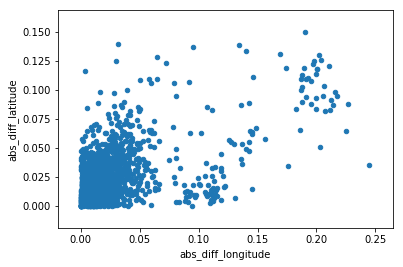

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
plot = train_df.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

In [5]:
from sklearn.model_selection import train_test_split
fare_amount = train_df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split( train_df[['abs_diff_longitude','abs_diff_latitude']], fare_amount, train_size=50000, test_size=5000, random_state=42)

In [6]:
train_X = np.column_stack((X_train.abs_diff_longitude, X_train.abs_diff_latitude, np.ones(len(X_train))))
train_y = np.array(y_train)

test_X = np.column_stack((X_test.abs_diff_longitude, X_test.abs_diff_latitude, np.ones(len(X_test))))
test_y = np.array(y_test)

print(train_X.shape)
print(train_y.shape)

(50000, 3)
(50000,)


In [7]:
# The lstsq function returns several things, and we only care about the actual weight vector w.
(w, _, _, _) = np.linalg.lstsq(train_X, train_y, rcond = None)
print(w)

[177.30817434 144.0720818    4.15428642]


In [8]:
w_OLS = np.matmul(np.matmul(np.linalg.inv(np.matmul(train_X.T, train_X)), train_X.T), train_y)
print(w_OLS)

[177.30817434 144.0720818    4.15428642]


In [9]:
y_pred = np.matmul(test_X, w).round(decimals = 2)

In [10]:
y_pred

array([11.18, 14.62, 14.56, ...,  8.99,  6.17,  6.75])

In [11]:
test_X

array([[0.001372  , 0.047102  , 1.        ],
       [0.034355  , 0.030377  , 1.        ],
       [0.016555  , 0.051866  , 1.        ],
       ...,
       [0.015735  , 0.014216  , 1.        ],
       [0.004871  , 0.007966  , 1.        ],
       [0.00161743, 0.01600266, 1.        ]])

In [12]:
test_y

array([22.5, 11. , 11.3, ...,  7.5,  8.1,  8.5])

In [13]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
print(rmse)

7.651371244424101
